# Tutorial 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

## Exercise 1.1: Estimate π with Monte Carlo

a) Estimate π by “shooting” (i.e., drawing random numbers) N times uniformly on a
square and counting the number of points hitting a disc target: the ratio of hits to
N should correspond to the ratio of the areas of the target to the area you shoot
on.

In [57]:
def hit_circle(x, y, r):

    return x**2 + y**2 <= r

def estimate_pi(N, r):
    x = np.random.rand(N)*2-1
    y = np.random.rand(N)*2-1

    num_of_hits = np.sum(hit_circle(x, y, r))
    circle_area = 4*num_of_hits/N
    pi = circle_area/(r**2)

    return pi

In [58]:
N = 1000000
radius = 1
print(f" For N = {N}, the estimate of π is {estimate_pi(N, radius)}.")

 For N = 1000000, the estimate of π is 3.14198.


b) Estimate the variance of the error for given N by repeating this a few times.

In [59]:
N = 1000000
radius = 1
iter = 100

pi = []
for i in range(iter):
    pi += [estimate_pi(N, radius)]

error = np.array(pi) - np.pi
variance = np.var(error)

print(f"For N = {N}, the variance of the error is {variance}.")

For N = 1000000, the variance of the error is 3.05133488640004e-06.


c) Plot the variance of the error versus N on a log-log scale. What is the scaling of
the error?

In [60]:
N = [10**1, 2*(10**1), 10**2, 2*(10**2), 10**3, 10**4, 10**5, 10**6, 10**7]
radius = 1
iter = 100

variance = []
for n in N:
    pi = []
    for i in range(iter):
        pi += [estimate_pi(n, radius)]
    error = np.array(pi) - np.pi
    variance += [np.var(error)]


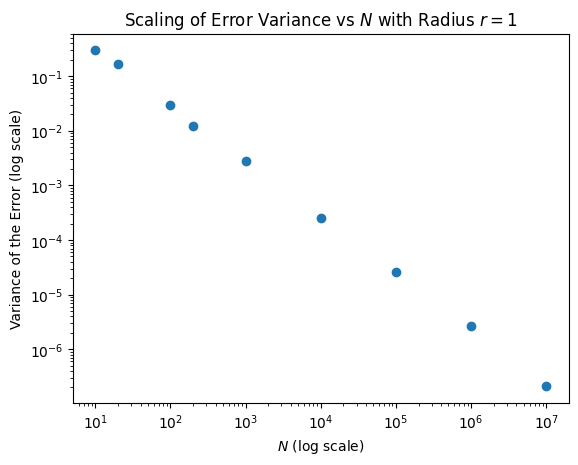

In [61]:
plt.scatter(N,variance)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("$N$ (log scale)")
plt.ylabel("Variance of the Error (log scale)")
plt.title("Scaling of Error Variance vs $N$ with Radius $r = 1$")
plt.show()

The $\log(\text{error variance})$ scales **linearly decreasing** with $\log(N)$.

Now, we turn to a different problem. Consider π given, we use Monte Carlo to estimate
the volume of d-dimension sphere.

d) Generalize your code to estimate the volume of a d-dimensional sphere. Does it run
much slower for large d? How does the error of the estimates scale for d and N?

In [2]:
def hit_d_ball(coord, r):
    
    return np.sum((coord)**2, axis=1) <= r

def estimate_d_ball_volume(N, d, r):
    coord = (np.random.rand(N, d)*2-1)

    num_of_hits = np.sum(hit_d_ball(coord, r))
    d_ball_volume = ((2*r)**d) * num_of_hits/N

    return d_ball_volume

In [6]:
N = 10**6
radius = 1

print(f"For N = {N} and radius r = {radius}, the estimate volume of 2-dimensional sphere (area of circle) is {estimate_d_ball_volume(N, 2, radius)}. And the estimate volume of 3-dimensional sphere (volume of sphere) is {estimate_d_ball_volume(N, 3, radius)}.")

For N = 1000000 and radius r = 1, the estimate volume of 2-dimensional sphere (area of circle) is 3.142436. And the estimate volume of 3-dimensional sphere (volume of sphere) is 4.185552.


In [81]:
import time

N = 10**6
d = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
radius = 1

runtime = []
volume = []
for dimension in d:
    start = time.time()
    volume += [estimate_d_ball_volume(N, dimension, radius)]
    end = time.time()

    runtime += [end - start]

y = 0.01211829951615806 * x + 0.008039890014667317


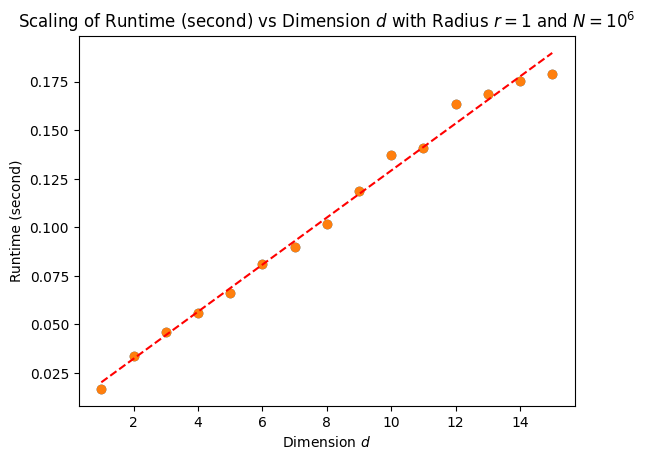

In [83]:
x = d
y = runtime
# define the estimate objective function (linear/polynomial order-1)
def objective(x, a, b):
 return a*x + b
# curve fit
popt, _ = opt.curve_fit(objective, x, y)
# summarize the parameter values
a, b = popt
print(f"y = {a} * x + {b}")
# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x)+1, 1)
# calculate the output for the range
y_line = objective(x_line, a, b)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')

plt.scatter(d,runtime)
plt.xlabel("Dimension $d$")
plt.ylabel("Runtime (second)")
plt.title("Scaling of Runtime (second) vs Dimension $d$ with Radius $r = 1$ and $N = 10^6$")
plt.show()

The runtime scales **linearly increasing** with $d$. It does not run much slower as the time complexity is polynomial order-1 $O(d)$.

In [44]:
# correct volume from reference https://en.wikipedia.org/wiki/Volume_of_an_n-ball

correct_volume = [2, np.pi, np.pi*4/3, np.pi**2/2, np.pi**2*8/15, np.pi**3/6,
                  np.pi**3*16/105, np.pi**4/24, np.pi**4*32/945, np.pi**5/120, np.pi**5*64/10395,
                  np.pi**6/720, np.pi**6*128/135135, np.pi**7/5040, np.pi**7*256/2027025]
correct_volume

[2,
 3.141592653589793,
 4.1887902047863905,
 4.934802200544679,
 5.263789013914324,
 5.167712780049969,
 4.724765970331401,
 4.058712126416768,
 3.298508902738706,
 2.550164039877345,
 1.8841038793899,
 1.3352627688545893,
 0.910628754783283,
 0.5992645293207919,
 0.3814432808233044]

In [67]:
N = 10**6
d = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
radius = 1
iter = 100

avg_abs_error = []
for dimension in d:
     abs_error = abs(correct_volume[dimension-1] - np.array([estimate_d_ball_volume(N, dimension, radius) for i in range(iter)]))
     avg_abs_error += [np.average(abs_error)]

In [68]:
avg_abs_error

[0.0,
 0.0012935754256331044,
 0.0032475363829112245,
 0.0062353040653614755,
 0.008393979721713487,
 0.014218895600999364,
 0.02019396059337197,
 0.026026219773317223,
 0.03449343999999999,
 0.042496,
 0.041087369648807985,
 0.056037932360357506,
 0.07025811019133131,
 0.07723259765433665,
 0.08702943191766956]

y = 0.0003729109195696486 * x^2 + 0.0003478445659855913 * x + -0.001060435648758373


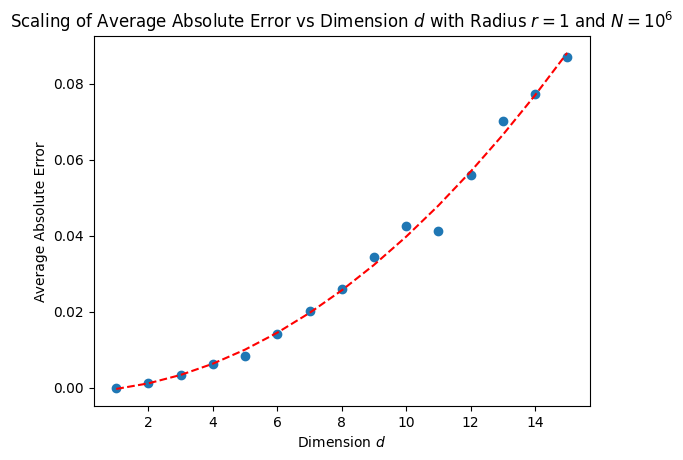

In [80]:
x = d
y = avg_abs_error
# define the estimate objective function (polynomial order-2)
def objective(x, a, b, c):
 return a*x**2 + b*x + c
# curve fit
popt, _ = opt.curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt
print(f"y = {a} * x^2 + {b} * x + {c}")
# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x)+1, 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')

plt.xlabel("Dimension $d$")
plt.ylabel("Average Absolute Error")
plt.title("Scaling of Average Absolute Error vs Dimension $d$ with Radius $r = 1$ and $N = 10^6$")
plt.show()
plt.show()

The average absolute error scales **polynomially increasing** with $d$.

In [54]:
N = [10**1, 2*(10**1), 10**2, 2*(10**2), 10**3, 10**4, 10**5, 10**6, 10**7]
dimension = 3
radius = 1
iter = 100

avg_abs_error = []
for n in N:
     abs_error = abs(correct_volume[dimension-1] - np.array([estimate_d_ball_volume(n, dimension, radius) for i in range(iter)]))
     avg_abs_error += [np.average(abs_error)]

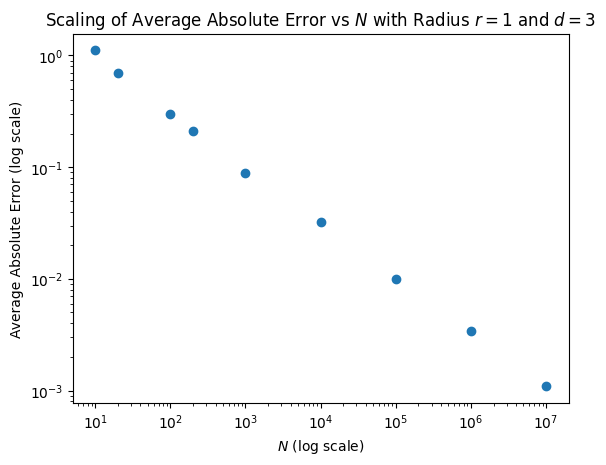

In [56]:
plt.scatter(N,avg_abs_error)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("$N$ (log scale)")
plt.ylabel("Average Absolute Error (log scale)")
plt.title("Scaling of Average Absolute Error vs $N$ with Radius $r = 1$ and $d = 3$")
plt.show()

The $\log(\text{average absolute error})$ scales **linearly decreasing** with $\log(N)$.

## Exercise 1.2: Importance Sampling with Monte Carlo

The goal of this exercise is to find a Monte Carlo estimate of $I=\int_{a=0}^{\infty} \mathrm{d} x \frac{\mathrm{e}^{-x}}{1+(x-1)^2}$. (It is fine to cut off the upper limit at some value e.g. $b=10$.)

a) Write a function that calculates $I$ by using that $I=\bar{f} \times(b-a)$ with $f(x)=$ $\frac{e^{-x}}{1+(x-1)^2}$. (You can find an estimate of $\bar{f}$ by uniformly generating some $x_i \in[a, b$ ) and averaging over $f\left(x_i\right)$.) Get an idea of the error of this estimate.

b) Now we will use importance sampling. The p.d.f. $g(x)=\alpha \mathrm{e}^{-\alpha x}$ with $\alpha \approx 1.46$ is a better choice than a uniform distribution. Use importance sampling to estimate $I$ over the same number of samples as in (a). How much did your result improve?

## Exercise 1.3: Metropolis Algorithm for the 2D Ising Model

Download the script metropolis.py from the Gitlab, which implements the Metropolis algorithm for the classical 2D Ising model $H=-J \sum_{\langle i, j\rangle} \sigma_i \sigma_j$ with $J \equiv 1$. The 2D Ising model has a critical point at $T_c=2 J / \ln (1+\sqrt{2}) \approx 2.269$.

a) What is the script plotting?

b) What are "typical" configurations at temperatures $T \gg T_c, T \approx T_c$ and $T \ll T_c$ ?

c) Plot the energy $E$ and specific heat $C_V$ versus temperature $T$ for different system sizes $L$.

d) Adjust the script to measure the magnetization $M=\frac{1}{L^2} \sum_i \sigma_i$. Plot how $M$ changes with simulation time (=the number of updates performed) for $T>T_c, T \approx T_c$ and $T<T_c$. Which time scales can you recognize? In which cases do you still get the correct expectation value $\langle M\rangle=0$ ? Plot $\langle|M|\rangle$ (i.e. taking the absolute value of $M$ before averaging) versus $T$ to see the transition.

e) Include a magnetic field $h$ coupling to the spins with a term $H^{\prime}=-h \sum_i \sigma_i$. Plot $\langle M\rangle$ versus $T$.